In [1]:
import numpy
from keras.datasets import imdb

from sequence_classifier_comparator import SequenceClassifierComparator
from neural_networks_classifier import NeuralNetworksClassifier
from knn_classifier import KNNClassifier
from svm_classifier import SVMClassifier
from hmm_classifier import HMMClassifier
from results_reader import ResultsReader
from results_writer import ResultsWriter
from helpers import datasets_helper

    
    

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset but only keep the top n words, zero the rest
top_words = 50000
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# (X_train, y_train), (X_test, y_test) = datasets_helper.get_sentiment_data(train_test_ratio = 0.5)
# (X_train, y_train), (X_test, y_test) = datasets_helper.get_troll_data(train_test_ratio = 0.5)

(X_train, y_train), (X_test, y_test) = datasets_helper.get_valley_data(train_test_ratio = 0.5)


X = numpy.concatenate((X_train, X_test))
y = numpy.concatenate((y_train, y_test))

In [3]:
X = X[:500]
y = y[:500]
print(X[0:4])
print(y[0:4])

[ list([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3])
 list([2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
 list([5, 5, 2, 0, 3, 2, 1, 5, 0, 3, 3, 5, 2, 2, 2, 0, 1, 4, 3, 2, 5, 0, 5, 2, 0, 3, 3, 4, 3, 1, 0, 1, 2, 5, 0, 1, 0, 3, 3, 0, 5, 3, 3, 0, 2, 5, 2, 1, 5, 3, 5, 2, 5, 0, 1, 0, 1, 3, 0, 5, 3, 0, 3, 5, 0, 3, 1, 0, 1, 4, 5, 0, 3, 1, 2, 0, 1, 4, 1, 4, 0, 1, 3, 0, 1, 0, 2, 1, 0, 2, 4, 3, 5, 3, 3, 5, 2])
 list([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [4]:
comparator = SequenceClassifierComparator(ResultsWriter(), ResultsReader())

In [5]:
nn_classifier = NeuralNetworksClassifier(top_words=top_words)
comparator.add_classifier(nn_classifier)

In [6]:
svm_classifier = SVMClassifier()
svm_transformer = svm_classifier.get_transformer()
comparator.add_classifier(svm_classifier, sequence_transformer=svm_transformer)

In [7]:
knn_classifier = KNNClassifier(n_neighbors=1)
comparator.add_classifier(knn_classifier)

In [8]:
hmm_classifier = HMMClassifier()
hmm_transformer = hmm_classifier.get_transformer()
comparator.add_classifier(hmm_classifier, sequence_transformer=hmm_transformer)

In [9]:
comparator.fit_predict(X, y, rounds=2)

Neural Networks, round 1, with 3-fold cross validation
Epoch 1/3
250/250 [==============================] - 5s 18ms/step - loss: 0.6885 - acc: 0.6280
Epoch 2/3
250/250 [==============================] - 4s 14ms/step - loss: 0.6728 - acc: 0.7520
Epoch 3/3
250/250 [==============================] - 3s 14ms/step - loss: 0.6458 - acc: 0.7640
Epoch 1/3
250/250 [==============================] - 5s 20ms/step - loss: 0.6858 - acc: 0.7360
Epoch 2/3
250/250 [==============================] - 3s 14ms/step - loss: 0.6695 - acc: 0.7480
Epoch 3/3
250/250 [==============================] - 3s 14ms/step - loss: 0.6352 - acc: 0.7440
Epoch 1/3
250/250 [==============================] - 6s 22ms/step - loss: 0.6869 - acc: 0.6920
Epoch 2/3
250/250 [==============================] - 4s 14ms/step - loss: 0.6667 - acc: 0.7880
Epoch 3/3
250/250 [==============================] - 3s 14ms/step - loss: 0.6294 - acc: 0.7680
Epoch 1/3
375/375 [==============================] - 6s 17ms/step - loss: 0.6848 - acc: 0.

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


KNN, round 2, with 3-fold cross validation
HMM, round 1, with 3-fold cross validation
HMM, round 2, with 3-fold cross validation


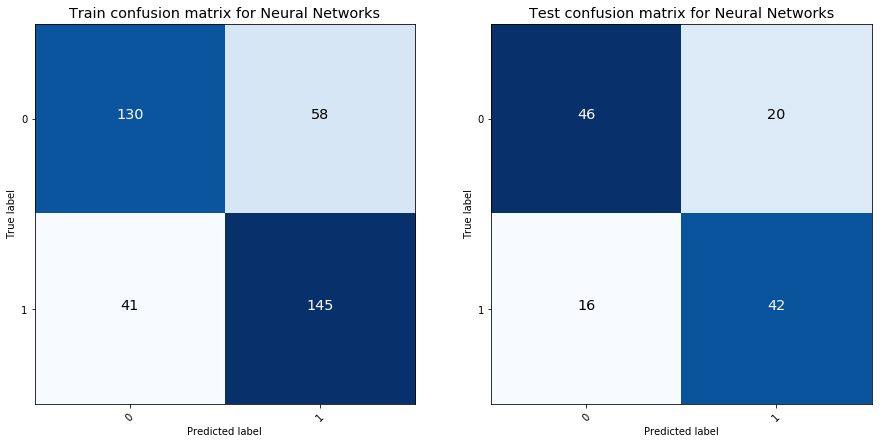

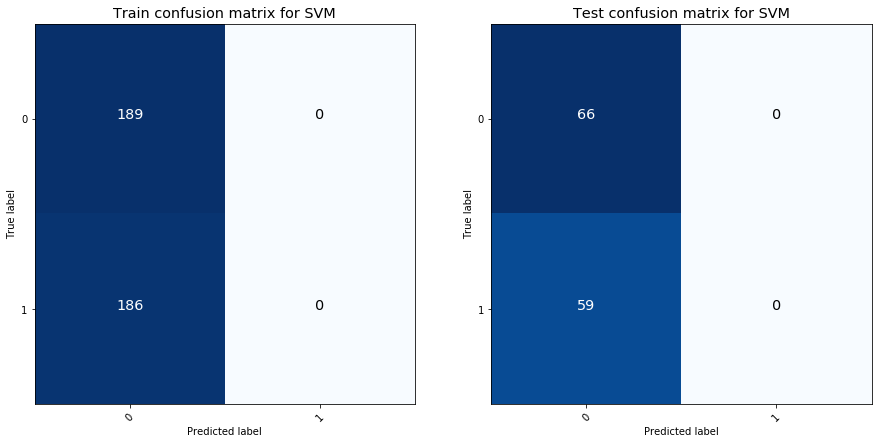

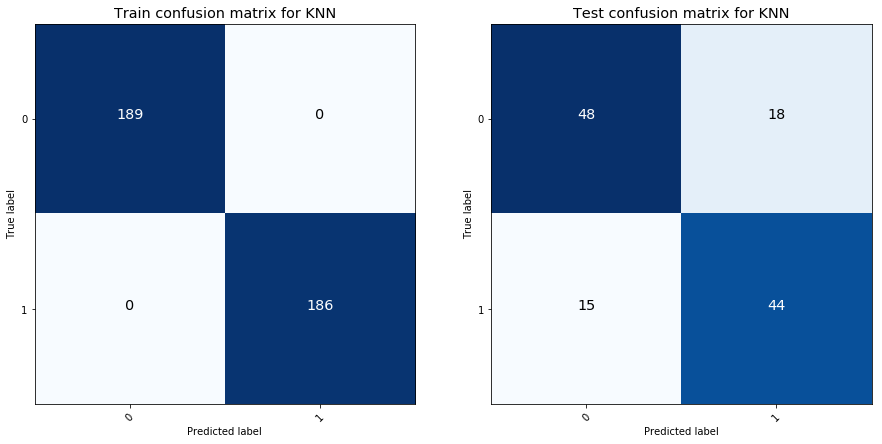

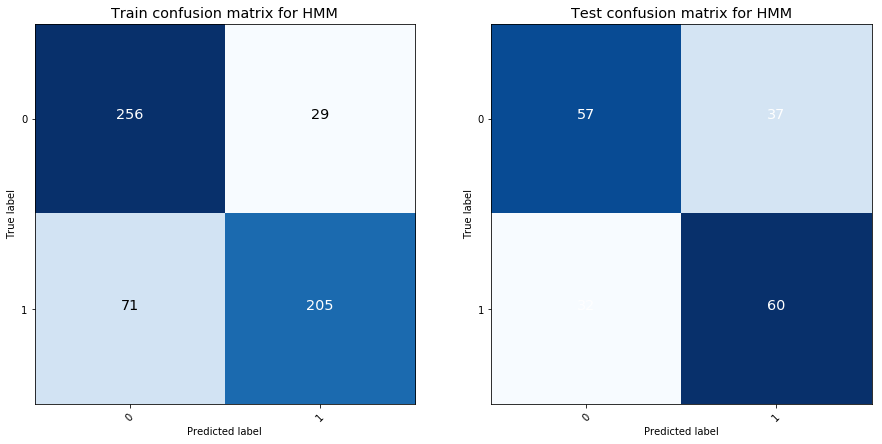

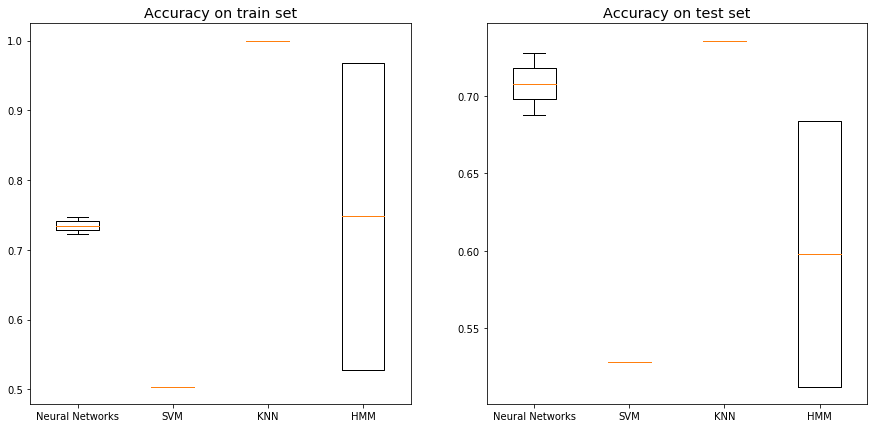

In [10]:
presenter = comparator.get_presenter()
presenter.show_all()